# Beat & Standing Wave (by Wolfram Language)

#### define the `beat` function

In [1]:
(* constant paramaters *)
A = 1;
ω1 = 4;
k1 = 2;

beat[t_][ω2_,k2_][showEnvelope_] := Module[
    {
        ωa, ωm,
        ka, km,
        up, ug,
        carrier, envelope, wave,
        table,
        range = {0,80}, plotColor = ColorData[68,"ColorList"],
        envelopePlot, wavePlot, fig
    },
    
    (* angular frequencies *)
    ωa = (ω1+ω2)/2;
    ωm = (ω1-ω2)/2;
    (* wave numbers *)
    ka = (k1+k2)/2;
    km = (k1-k2)/2;
    (* velocities *)
    up = ωa/ka //Quiet; 
    ug = ωm/km //Quiet;
    
    (* waves *)
    carrier [x_] :=    Cos[ka x - ωa t];
    envelope[x_] := 2A Cos[km x - ωm t];
    wave[x_] := carrier[x]*envelope[x];
    
    (* table of parameters *)
    table = TableForm[
        {
            Row/@{{Subscript["ω",1],"=",ω1//Round[#,0.01]&},{Subscript["ω",2],"=",ω2//Round[#,0.01]&},{Subscript["ω","a"],"=",ωa//Round[#,0.01]&},{Subscript["ω","m"],"=",ωm//Round[#,0.01]&},{Subscript["u","p"],"=",up//Round[#,0.01]&}},
            Row/@{{Subscript["k",1],"=",k1//Round[#,0.01]&},{Subscript["k",2],"=",k2//Round[#,0.01]&},{Subscript["k","a"],"=",ka//Round[#,0.01]&},{Subscript["k","m"],"=",km//Round[#,0.01]&},{Subscript["u","g"],"=",ug//Round[#,0.01]&}}
        },
        TableHeadings->{None,{"wave1","wave2","average","modulation","velocity"}},
        TableAlignments->{Center,Automatic}
    ];
    
    (* plots of waves *)
    envelopePlot = Plot[
        {
             envelope[x],
            -envelope[x]
        },
        {x,range[[1]],range[[2]]}, 
        PlotStyle->Directive[Gray,Thickness@Small]
    ];
    wavePlot = Plot[
        wave[x], 
        {x,range[[1]],range[[2]]}, 
        PlotStyle->{plotColor[[1]],Thickness@Large}
    ];
    (* combine the plots into a single figure *)
    fig = Show[
        {
            wavePlot,
            If[showEnvelope, envelopePlot, Nothing]
        },
        PlotRange->{{0,80},{-7,7}}, AxesOrigin->{0,-7},
        AxesLabel->{"x","y"}, GridLines->Automatic,
        ImageSize->Medium
    ];
    
    (* return *)
    Column@{ table, fig }
];

#### plot a static figure

wave1   wave2    average   modulation   velocity
   ω =4.   ω =4.    ω =4.     ω =0.        u =2.11
    1       2        a         m            p

   k =2.   k =1.8   k =1.9    k =0.1       u =0.
    1       2        a         m            g
-Graphics-
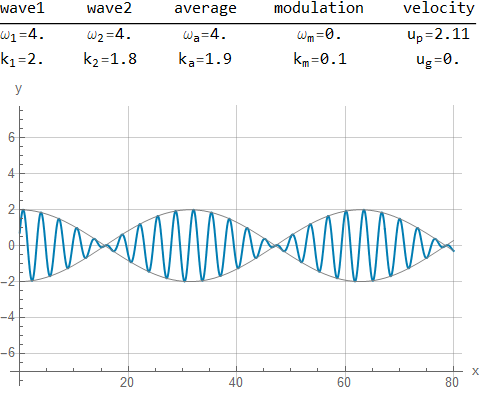

In [6]:
beat[0.3][4,1.8][True]

#### create an animation (export a GIF file)

In [ ]:
Export["beat.gif",
    Table[
        beat[t][3.5,-1.8][True],
        {t,0,10,0.1}
    ],
    ImageResolution->96,
    "DisplayDurations"->1/15, AnimationRepetitions->Infinity
]

#### create an interactive interface (export a CDF file)

In [ ]:
Export[
    FileNameJoin@{Directory[],"beat.cdf"},
    Notebook[{Cell[BoxData@ToBoxes@#,"Output"]}, WindowSize->All],
    "CDF"
]& @
Manipulate[
    beat[t][ω2,If[k2reversed,-k2,k2]][showEnvelope],
    
    {{ω2, ω1, Subscript["ω",2]}, ω1-0.5,ω1},
    {{k2, k1, Subscript["k",2]}, k1-0.3,k1},
    {{k2reversed  , False, "direction reversed"}, {True,False}},
    {{showEnvelope, True , "show envelope"     }, {True,False}},
    {{t, 0, "t"}, 0,10, Animator, 
        DefaultDuration->7,
        AnimationRepetitions->Infinity, AnimationRunning->False},
    TrackedSymbols->{ω2,k2,k2reversed,showEnvelope,t},
    
    ControlPlacement->Right,
    SaveDefinitions->True
]